 #  <p style="text-align: center;">Predicting Prospect Propensity</p> 

Using web clicks data about the links clicked by the user while he is browsing to predict his propensity to buy the product. Using that propensity, will decide whether we want to offer chat to the customer with an agent. 

## Loading and Viewing Data


In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

prospect_data = pd.read_csv("browsing.csv")
prospect_data.dtypes

SESSION_ID         int64
IMAGES             int64
REVIEWS            int64
FAQ                int64
SPECS              int64
SHIPPING           int64
BOUGHT_TOGETHER    int64
COMPARE_SIMILAR    int64
VIEW_SIMILAR       int64
WARRANTY           int64
SPONSORED_LINKS    int64
BUY                int64
dtype: object

In [2]:
prospect_data.shape

(500, 12)

The data contains information about the various links on the website that are clicked by the user during his browsing. This is past data that will be used to build the model.

- Session ID : A unique identifier for the web browsing session
- Buy : Whether the prospect ended up buying the product
- Other columns : a 0 or 1 indicator to show whether the prospect visited that particular page or did the activity mentioned.


In [3]:
prospect_data.head()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
0,1001,0,0,1,0,1,0,0,0,1,0,0
1,1002,0,1,1,0,0,0,0,0,0,1,0
2,1003,1,0,1,1,1,0,0,0,1,0,0
3,1004,1,0,0,0,1,1,1,0,0,0,0
4,1005,1,1,1,0,1,0,1,0,0,0,0


In [4]:
col= list(prospect_data.columns)
col.pop(0)
col

['IMAGES',
 'REVIEWS',
 'FAQ',
 'SPECS',
 'SHIPPING',
 'BOUGHT_TOGETHER',
 'COMPARE_SIMILAR',
 'VIEW_SIMILAR',
 'WARRANTY',
 'SPONSORED_LINKS',
 'BUY']

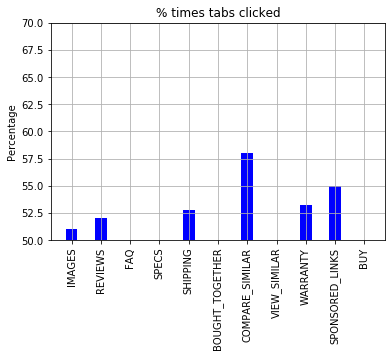

['REVIEWS', 'BOUGHT_TOGETHER', 'COMPARE_SIMILAR', 'WARRANTY', 'SPONSORED_LINKS']


In [5]:
percent=[]
for i in col:
    percent.append(100*(sum(prospect_data[i].values)/500))
percent

plt.bar(col, percent, color ='blue',  
        width = 0.4) 
plt.xticks(rotation ='vertical')
#plt.xlabel("Courses offered") 
plt.ylabel("Percentage") 
plt.ylim([50, 70])
plt.title("% times tabs clicked") 
plt.grid()

plt.show() 
print(['REVIEWS','BOUGHT_TOGETHER','COMPARE_SIMILAR','WARRANTY','SPONSORED_LINKS'])

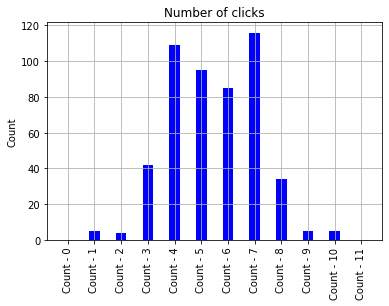

No. of clicks  0 5 4 42 109 95 85 116 34 5 5 0


In [6]:
Total_clicks=[]
count=[]
Sum = []
for i in range(12):
    Total_clicks.append(0)
    x="Count - "+str(i)
    count.append(x)
for i in range(len(prospect_data)):
    x=sum(prospect_data.iloc[i][1:])
    Total_clicks[x]+=1
    Sum.append(x)

# Adding SUm of clicks in data
prospect_data["Sum"]=Sum
    
plt.bar(count, Total_clicks, color ='blue',  
        width = 0.4) 
plt.xticks(rotation ='vertical')
#plt.xlabel("Courses offered") 
plt.ylabel("Count") 
#plt.ylim([50, 70])
plt.title("Number of clicks") 
plt.grid()

plt.show() 
print("No. of clicks ",*Total_clicks)
#print(['REVIEWS','BOUGHT_TOGETHER','COMPARE_SIMILAR','WARRANTY','SPONSORED_LINKS'])

In [7]:
#Do summary statistics analysis of the data
prospect_data.describe()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY,Sum
count,500.000000,500.000000,500.0000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,1250.500000,0.510000,0.5200,0.440000,0.4800,0.528000,0.500000,0.580000,0.468000,0.532000,0.550000,0.370000,5.47800
std,144.481833,0.500401,0.5001,0.496884,0.5001,0.499715,0.500501,0.494053,0.499475,0.499475,0.497992,0.483288,1.63795
min,1001.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1125.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
50%,1250.500000,1.000000,1.0000,0.000000,0.0000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,5.00000
75%,1375.250000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000
max,1500.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.00000


### Correlation 

In [8]:
Corr=prospect_data.corr()['BUY']
Corr

SESSION_ID         0.026677
IMAGES             0.046819
REVIEWS            0.404628
FAQ               -0.095136
SPECS              0.009950
SHIPPING          -0.022239
BOUGHT_TOGETHER   -0.103562
COMPARE_SIMILAR    0.190522
VIEW_SIMILAR      -0.096137
WARRANTY           0.179156
SPONSORED_LINKS    0.110328
BUY                1.000000
Sum                0.484976
Name: BUY, dtype: float64

In [9]:
prospect_data.corr()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY,Sum
SESSION_ID,1.000000,-0.044890,8.342708e-02,-0.052228,0.044376,0.031226,4.267782e-03,0.029731,0.001250,0.046514,0.039537,0.026677,0.063718
IMAGES,-0.044890,1.000000,-1.009009e-01,-0.058031,0.100901,-0.125342,-2.000400e-02,0.098083,0.045382,0.082907,0.118618,0.046819,0.362131
REVIEWS,0.083427,-0.100901,1.000000e+00,-0.035485,0.121795,0.013793,1.244446e-17,-0.047043,-0.013478,-0.066750,0.056327,0.404628,0.402984
FAQ,-0.052228,-0.058031,-3.548461e-02,1.000000,-0.045162,-0.009362,-4.029115e-02,-0.143676,-0.031976,-0.016473,-0.170075,-0.095136,0.107948
SPECS,0.044376,0.100901,1.217949e-01,-0.045162,1.000000,-0.102002,-1.200961e-01,-0.155729,0.141844,0.058727,-0.136795,0.009950,0.267351
SHIPPING,0.031226,-0.125342,1.379267e-02,-0.009362,-0.102002,1.000000,-1.842892e-01,-0.195786,-0.004432,-0.051771,0.119184,-0.022239,0.134190
BOUGHT_TOGETHER,0.004268,-0.020004,1.244446e-17,-0.040291,-0.120096,-0.184289,1.000000e+00,0.121566,0.024049,0.056115,-0.060302,-0.103562,0.206562
COMPARE_SIMILAR,0.029731,0.098083,-4.704322e-02,-0.143676,-0.155729,-0.195786,1.215661e-01,1.000000,-0.005847,0.046452,0.085525,0.190522,0.298112
VIEW_SIMILAR,0.001250,0.045382,-1.347840e-02,-0.031976,0.141844,-0.004432,2.404930e-02,-0.005847,1.000000,0.044277,-0.037867,-0.096137,0.326152
WARRANTY,0.046514,0.082907,-6.675016e-02,-0.016473,0.058727,-0.051771,5.611504e-02,0.046452,0.044277,1.000000,-0.042701,0.179156,0.391564


Looking at the correlations saw some features like REVIEWS, BOUGHT_TOGETHER, COMPARE_SIMILAR, WARRANTY and SPONSORED_LINKS have medium correlation to the target variable. So reducing feature set to that list of variables.

In [10]:
#Drop columns with low correlation
predictors = prospect_data[['REVIEWS','BOUGHT_TOGETHER','COMPARE_SIMILAR','WARRANTY','SPONSORED_LINKS','Sum']]
targets = prospect_data.BUY


In [11]:
predictors.corr()

,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS,Sum
REVIEWS,1.000000e+00,1.244446e-17,-0.047043,-0.066750,0.056327,0.402984
BOUGHT_TOGETHER,1.244446e-17,1.000000e+00,0.121566,0.056115,-0.060302,0.206562
COMPARE_SIMILAR,-4.704322e-02,1.215661e-01,1.000000,0.046452,0.085525,0.298112
WARRANTY,-6.675016e-02,5.611504e-02,0.046452,1.000000,-0.042701,0.391564
SPONSORED_LINKS,5.632720e-02,-6.030227e-02,0.085525,-0.042701,1.000000,0.315826
Sum,4.029842e-01,2.065621e-01,0.298112,0.391564,0.315826,1.000000


There is no problem of multi collinearity

##  Training and Testing Split

We now split the model into training and testing data in the ratio of 70:30

In [12]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", pred_train.shape, "Predictor - Testing : ", pred_test.shape )


Predictor - Training :  (350, 6) Predictor - Testing :  (150, 6)


## Build Model and Check Accuracy

Naive Bayes

Confusion Mtx :
 [[75 17]
 [26 32]]

Accuracy :  0.7133333333333334

               precision    recall  f1-score   support

           0       0.74      0.82      0.78        92
           1       0.65      0.55      0.60        58

    accuracy                           0.71       150
   macro avg       0.70      0.68      0.69       150
weighted avg       0.71      0.71      0.71       150



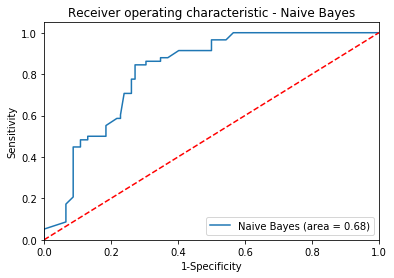

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


classifier=GaussianNB()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)
#print(predictions)

#Analyze accuracy of predictions
nb_cm=sklearn.metrics.confusion_matrix(tar_test,predictions)
print("Naive Bayes\n")
print("Confusion Mtx :\n",nb_cm)
nb_accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)
print("\nAccuracy : ",nb_accuracy)

print("\n",classification_report(tar_test, predictions))

logit_roc_auc = roc_auc_score(tar_test, classifier.predict(pred_test))
fpr, tpr, thresholds = roc_curve(tar_test,  classifier.predict_proba(pred_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


Instead of doing a Yes/No prediction, we can instead do a probability computation to show the probability for the prospect to buy the product

In [14]:
pred_prob=classifier.predict_proba(pred_test)

pred_prob[0,1]

0.022790676401912964

C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression

Confusion Mtx :
 [[82 10]
 [25 33]]

Accuracy :  0.7666666666666667

               precision    recall  f1-score   support

           0       0.77      0.89      0.82        92
           1       0.77      0.57      0.65        58

    accuracy                           0.77       150
   macro avg       0.77      0.73      0.74       150
weighted avg       0.77      0.77      0.76       150



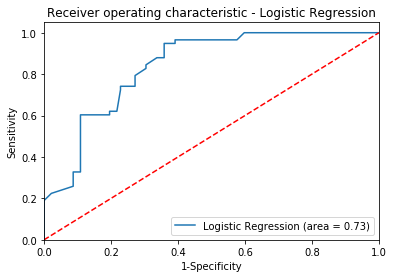

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
lr_classifier=logreg.fit(pred_train,tar_train)

predictions_lr=lr_classifier.predict(pred_test)
#print(predictions_lr)
#Analyze accuracy of predictions
lr_cm=sklearn.metrics.confusion_matrix(tar_test,predictions_lr)
print("Logistic Regression\n")
print("Confusion Mtx :\n",lr_cm)
lr_accuracy = sklearn.metrics.accuracy_score(tar_test, predictions_lr)
print("\nAccuracy : ",lr_accuracy)

print("\n",classification_report(tar_test, predictions_lr))

import warnings
warnings.filterwarnings("ignore")



logit_roc_auc = roc_auc_score(tar_test, lr_classifier.predict(pred_test))
fpr, tpr, thresholds = roc_curve(tar_test,  logreg.predict_proba(pred_test)[:,1])

warnings.filterwarnings("ignore")

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


The probability above can be read as 35% chance that the prospect will buy the product.

## Real time predictions

Will give preference to Naive Bayes over LR bcz of higher Accuracy and higher AUC

Now that the model has been built, let us use it for real time predictions. So when the customer starts visiting the pages one by one, we collect that list and then use it to compute the probability. We do that for every new click that comes in.

So let us start. The prospect just came to the website. There are no significant clicks. Let us compute the probability. The array of values passed has the values for REVIEWS, BOUGHT_TOGETHER, COMPARE_SIMILAR, WARRANTY and SPONSORED_LINKS. So the array is all zeros to begin with

In [16]:
browsing_data = np.array([0,0,0,0,0,0]).reshape(1, -1)
print("New visitor: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )


New visitor: propensity : [0.01471722]


In [17]:
browsing_data = np.array([0,0,1,0,0,1]).reshape(1, -1)
print("After checking similar products: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )


After checking similar products: propensity : [0.04321424]


It goes up. Next, he checks out reviews.

In [18]:
browsing_data = np.array([1,0,1,0,0,2]).reshape(1, -1)
print("After checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )


After checking reviews: propensity : [0.21559196]


In [19]:
browsing_data = np.array([1,1,1,1,1,5]).reshape(1, -1)
print("After checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )


After checking reviews: propensity : [0.34300368]


In [20]:
browsing_data = np.array([0,1,1,1,1,4]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([1,0,1,1,1,4]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([1,1,0,1,1,4]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([1,1,1,0,1,4]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([1,1,1,1,0,4]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )




After checking reviews: propensity : [0.07901509]

After checking reviews: propensity : [0.43320189]

After checking reviews: propensity : [0.14723693]

After checking reviews: propensity : [0.21579656]

After checking reviews: propensity : [0.26264142]


In [21]:
browsing_data = np.array([1,0,0,0,0,1]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([0,1,0,0,0,1]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([0,0,1,0,0,1]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([0,0,0,1,0,1]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )

browsing_data = np.array([0,0,0,0,1,1]).reshape(1, -1)
print("\nAfter checking reviews: propensity :",lr_classifier.predict_proba(browsing_data)[:,1] )




After checking reviews: propensity : [0.08332203]

After checking reviews: propensity : [0.0101002]

After checking reviews: propensity : [0.04321424]

After checking reviews: propensity : [0.02755805]

After checking reviews: propensity : [0.02142449]


In [22]:
comb=[]
for i in range(32):
    x=bin(i).replace("0b", "")
    if len(x)<5:
        y=""
        for j in range(5-len(x)):
            y+='0'
        y+=x
        y=list(y)
        y=[ int(i) for i in y]
        y.append(sum(y))
        y.append( lr_classifier.predict_proba(np.array(y).reshape(1, -1))[:,1][0] )
        comb.append(y)
        print(y)#,lr_classifier.predict_proba(np.array(y).reshape(1, -1))[:,1])
    else:
        x=list(x)
        x=[ int(i) for i in x]
        x.append(sum(x))
        x.append( lr_classifier.predict_proba(np.array(x).reshape(1, -1))[:,1][0] )
        comb.append(x)
        print(x)#,lr_classifier.predict_proba(np.array(x).reshape(1, -1))[:,1])

[0, 0, 0, 0, 0, 0, 0.01471721528035306]
[0, 0, 0, 0, 1, 1, 0.02142448803797208]
[0, 0, 0, 1, 0, 1, 0.02755805035499358]
[0, 0, 0, 1, 1, 2, 0.039880575885609254]
[0, 0, 1, 0, 0, 1, 0.04321424497721898]
[0, 0, 1, 0, 1, 2, 0.062090415193916594]
[0, 0, 1, 1, 0, 2, 0.07892712401492769]
[0, 0, 1, 1, 1, 3, 0.1115835643757072]
[0, 1, 0, 0, 0, 1, 0.0101001977184617]
[0, 1, 0, 0, 1, 2, 0.014734763135584323]
[0, 1, 0, 1, 0, 2, 0.018990307291690402]
[0, 1, 0, 1, 1, 3, 0.02759048005503127]
[0, 1, 1, 0, 0, 2, 0.02992882847219149]
[0, 1, 1, 0, 1, 3, 0.043264278854518744]
[0, 1, 1, 1, 0, 3, 0.05529698783609601]
[0, 1, 1, 1, 1, 4, 0.07901509187594039]
[1, 0, 0, 0, 0, 1, 0.08332203116249733]
[1, 0, 0, 0, 1, 2, 0.11756478323880445]
[1, 0, 0, 1, 0, 2, 0.1470851380724003]
[1, 0, 0, 1, 1, 3, 0.20176477974889329]
[1, 0, 1, 0, 0, 2, 0.2155919642692804]
[1, 0, 1, 0, 1, 3, 0.2871647196459075]
[1, 0, 1, 1, 0, 3, 0.34273118285362597]
[1, 0, 1, 1, 1, 4, 0.43320189173048684]
[1, 1, 0, 0, 0, 2, 0.058459608199425105]

In [23]:
import pandas as pd
df= pd.DataFrame(data=comb)
col=list(predictors.columns)
col.append("Probability")
df.columns=col
df['Probability'] = 100*df['Probability']
df.sort_values(by = ['Sum','Probability'], ascending = False)

,REVIEWS,BOUGHT_TOGETHER,COMPARE_SIMILAR,WARRANTY,SPONSORED_LINKS,Sum,Probability
31,1,1,1,1,1,5,34.300368
23,1,0,1,1,1,4,43.320189
30,1,1,1,1,0,4,26.264142
29,1,1,1,0,1,4,21.579656
27,1,1,0,1,1,4,14.723693
15,0,1,1,1,1,4,7.901509
22,1,0,1,1,0,3,34.273118
21,1,0,1,0,1,3,28.716472
19,1,0,0,1,1,3,20.176478
28,1,1,1,0,0,3,15.806723


In [39]:
col=list(prospect_data.columns)
col.pop(0)
predictors = prospect_data[col]
predictors.drop(["BUY"], axis= 1 ,inplace = True)
targets = prospect_data.BUY

predictors

,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,Sum
0,0,0,1,0,1,0,0,0,1,0,3
1,0,1,1,0,0,0,0,0,0,1,3
2,1,0,1,1,1,0,0,0,1,0,5
3,1,0,0,0,1,1,1,0,0,0,4
4,1,1,1,0,1,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,1,1,1,1,0,0,0,1,6
496,1,1,1,1,0,0,1,1,1,0,8
497,0,1,0,0,1,0,0,1,0,1,4
498,0,1,1,1,0,1,0,0,1,0,5


In [40]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", pred_train.shape, "Predictor - Testing : ", pred_test.shape )


Predictor - Training :  (350, 11) Predictor - Testing :  (150, 11)


Naive Bayes

Confusion Mtx :
 [[70 10]
 [36 34]]

Accuracy :  0.6933333333333334

               precision    recall  f1-score   support

           0       0.66      0.88      0.75        80
           1       0.77      0.49      0.60        70

    accuracy                           0.69       150
   macro avg       0.72      0.68      0.67       150
weighted avg       0.71      0.69      0.68       150



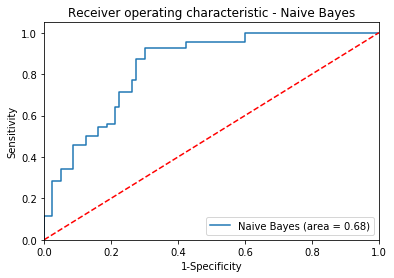

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


classifier=GaussianNB()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)
#print(predictions)

#Analyze accuracy of predictions
nb_cm=sklearn.metrics.confusion_matrix(tar_test,predictions)
print("Naive Bayes\n")
print("Confusion Mtx :\n",nb_cm)
nb_accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)
print("\nAccuracy : ",nb_accuracy)

print("\n",classification_report(tar_test, predictions))

logit_roc_auc = roc_auc_score(tar_test, classifier.predict(pred_test))
fpr, tpr, thresholds = roc_curve(tar_test,  classifier.predict_proba(pred_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


Logistic Regression

Confusion Mtx :
 [[80  0]
 [ 6 64]]

Accuracy :  0.96

               precision    recall  f1-score   support

           0       0.93      1.00      0.96        80
           1       1.00      0.91      0.96        70

    accuracy                           0.96       150
   macro avg       0.97      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



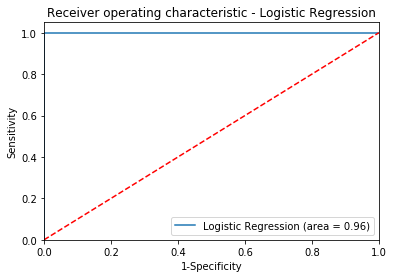

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
lr_classifier=logreg.fit(pred_train,tar_train)

predictions_lr=lr_classifier.predict(pred_test)
#print(predictions_lr)
#Analyze accuracy of predictions
lr_cm=sklearn.metrics.confusion_matrix(tar_test,predictions_lr)
print("Logistic Regression\n")
print("Confusion Mtx :\n",lr_cm)
lr_accuracy = sklearn.metrics.accuracy_score(tar_test, predictions_lr)
print("\nAccuracy : ",lr_accuracy)

print("\n",classification_report(tar_test, predictions_lr))

import warnings
warnings.filterwarnings("ignore")



logit_roc_auc = roc_auc_score(tar_test, lr_classifier.predict(pred_test))
fpr, tpr, thresholds = roc_curve(tar_test,  logreg.predict_proba(pred_test)[:,1])

warnings.filterwarnings("ignore")

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [49]:
comb=[]
for i in range(1024):
    
    x=bin(i).replace("0b", "")
    
    if len(x)<10:
        y=""
        for j in range(10-len(x)):
            y+='0'
        y+=x
        y=list(y)
        y=[ int(i) for i in y]
        y.append(sum(y))
        y.append( lr_classifier.predict_proba(np.array(y).reshape(1, -1))[:,1][0] )
        comb.append(y)
        print(y)#,lr_classifier.predict_proba(np.array(y).reshape(1, -1))[:,1])
    else:
        x=list(x)
        x=[ int(i) for i in x]
        x.append(sum(x))
        x.append( lr_classifier.predict_proba(np.array(x).reshape(1, -1))[:,1][0] )
        comb.append(x)
        print(x)#,lr_classifier.predict_proba(np.array(x).reshape(1, -1))[:,1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03451866157745548]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0.0481298282327644]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0.06639336368218628]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0.09138351968169656]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0.025128866085145342]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0.03517239417791164]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0.048770976494421234]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0.06760848449206709]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0.06278650681499558]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0.08654490781503411]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0.11758486255520278]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 0.15857060272765666]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0.046074219952670754]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 0.06394013649034627]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 0.08765067001998172]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 0.11961684342405335]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0.022888957964602975]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0.0320666851770394]
[0, 0, 0

In [50]:
import pandas as pd
df= pd.DataFrame(data=comb)
col=list(predictors.columns)
col.append("Probability")
df.columns=col
df['Probability'] = 100*df['Probability']
df.sort_values(by = ['Sum','Probability'], ascending = False)

,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,Sum,Probability
1023,1,1,1,1,1,1,1,1,1,1,10,33.991461
1007,1,1,1,1,1,0,1,1,1,1,9,44.007547
1019,1,1,1,1,1,1,1,0,1,1,9,41.665666
895,1,1,0,1,1,1,1,1,1,1,9,35.438603
959,1,1,1,0,1,1,1,1,1,1,9,35.206491
...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,0,0,1,0,0,0,0,0,0,1,3.277305
128,0,0,1,0,0,0,0,0,0,0,1,3.245252
4,0,0,0,0,0,0,0,1,0,0,1,2.512887
16,0,0,0,0,0,1,0,0,0,0,1,2.288896


In [53]:
print(df.sort_values(by = ['Probability'], ascending = False))

      IMAGES  REVIEWS  FAQ  SPECS  SHIPPING  BOUGHT_TOGETHER  COMPARE_SIMILAR  \
811        1        1    0      0         1                0                1   
875        1        1    0      1         1                0                1   
939        1        1    1      0         1                0                1   
779        1        1    0      0         0                0                1   
1003       1        1    1      1         1                0                1   
...      ...      ...  ...    ...       ...              ...              ...   
20         0        0    0      0         0                1                0   
244        0        0    1      1         1                1                0   
84         0        0    0      1         0                1                0   
148        0        0    1      0         0                1                0   
212        0        0    1      1         0                1                0   

      VIEW_SIMILAR  WARRANT

In [56]:
df[df["Probability"]>40]

,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,Sum,Probability
267,0,1,0,0,0,0,1,0,1,1,4,47.653458
298,0,1,0,0,1,0,1,0,1,0,4,41.123625
299,0,1,0,0,1,0,1,0,1,1,5,49.693579
303,0,1,0,0,1,0,1,1,1,1,6,41.595077
331,0,1,0,1,0,0,1,0,1,1,5,46.315927
363,0,1,0,1,1,0,1,0,1,1,6,48.351678
367,0,1,0,1,1,0,1,1,1,1,7,40.296689
395,0,1,1,0,0,0,1,0,1,1,5,46.063403
427,0,1,1,0,1,0,1,0,1,1,6,48.097999
431,0,1,1,0,1,0,1,1,1,1,7,40.052498
